In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [6]:
mart_data  = pd.read_csv('/Users/jellashivaramkumar/Desktop/datasets/big_mart_data.csv')

In [8]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
mart_data.shape

(8523, 12)

In [12]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
mart_data['Item_Weight'] = mart_data['Item_Weight'].fillna(mart_data['Item_Weight'].mean())


In [32]:
mart_data['Outlet_Size']=mart_data['Outlet_Size'].fillna(mart_data['Outlet_Size'].mode())

In [34]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Figure size 600x600 with 0 Axes>

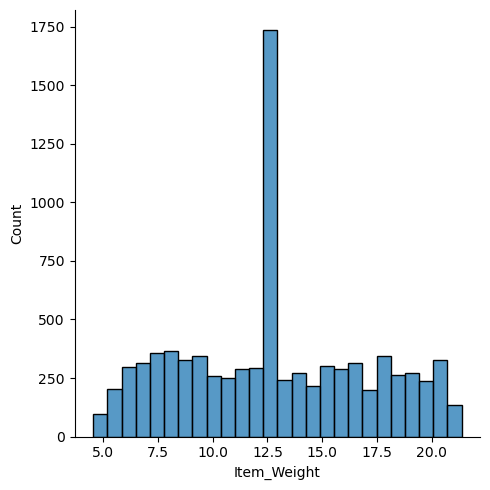

In [38]:
plt.figure(figsize=(6,6))
sns.displot(mart_data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

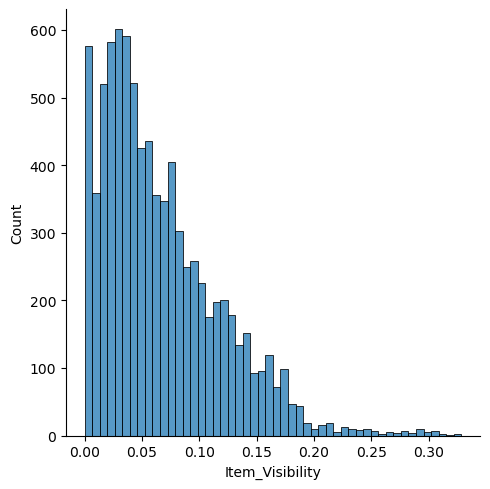

In [40]:
plt.figure(figsize=(6,6))
sns.displot(mart_data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

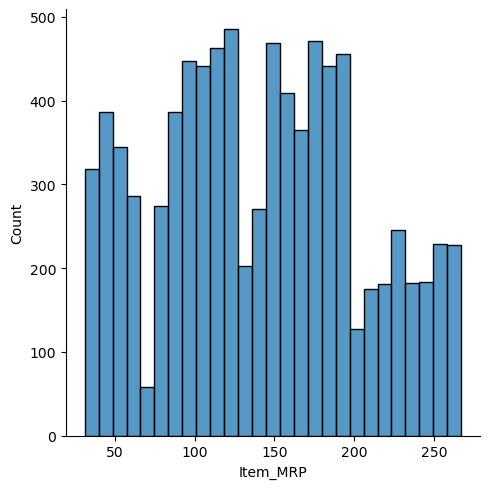

In [42]:
plt.figure(figsize=(6,6))
sns.displot(mart_data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

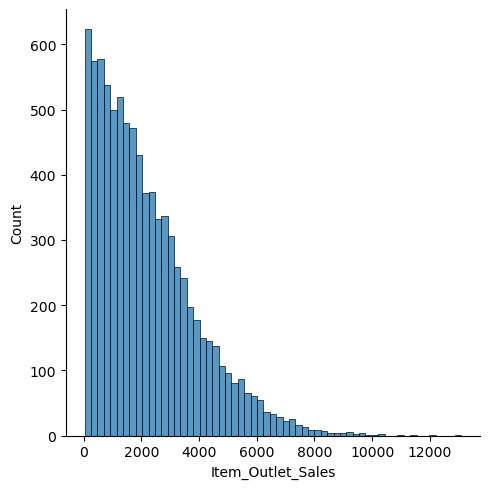

In [44]:
plt.figure(figsize=(6,6))
sns.displot(mart_data['Item_Outlet_Sales'])
plt.show()

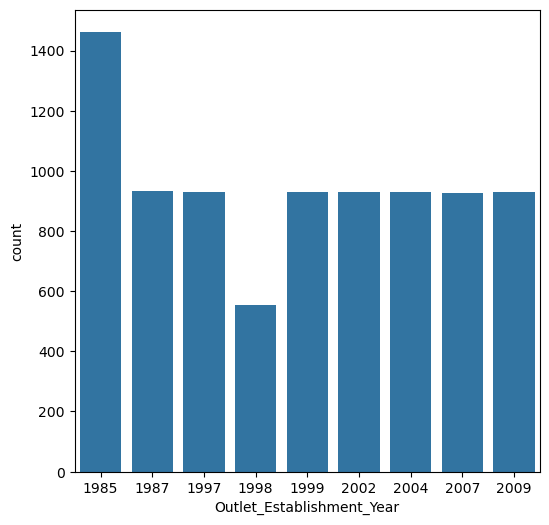

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=mart_data)
plt.show()

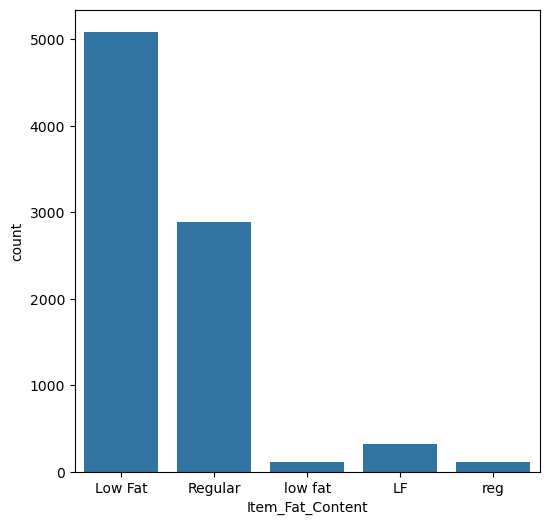

In [48]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=mart_data)
plt.show()

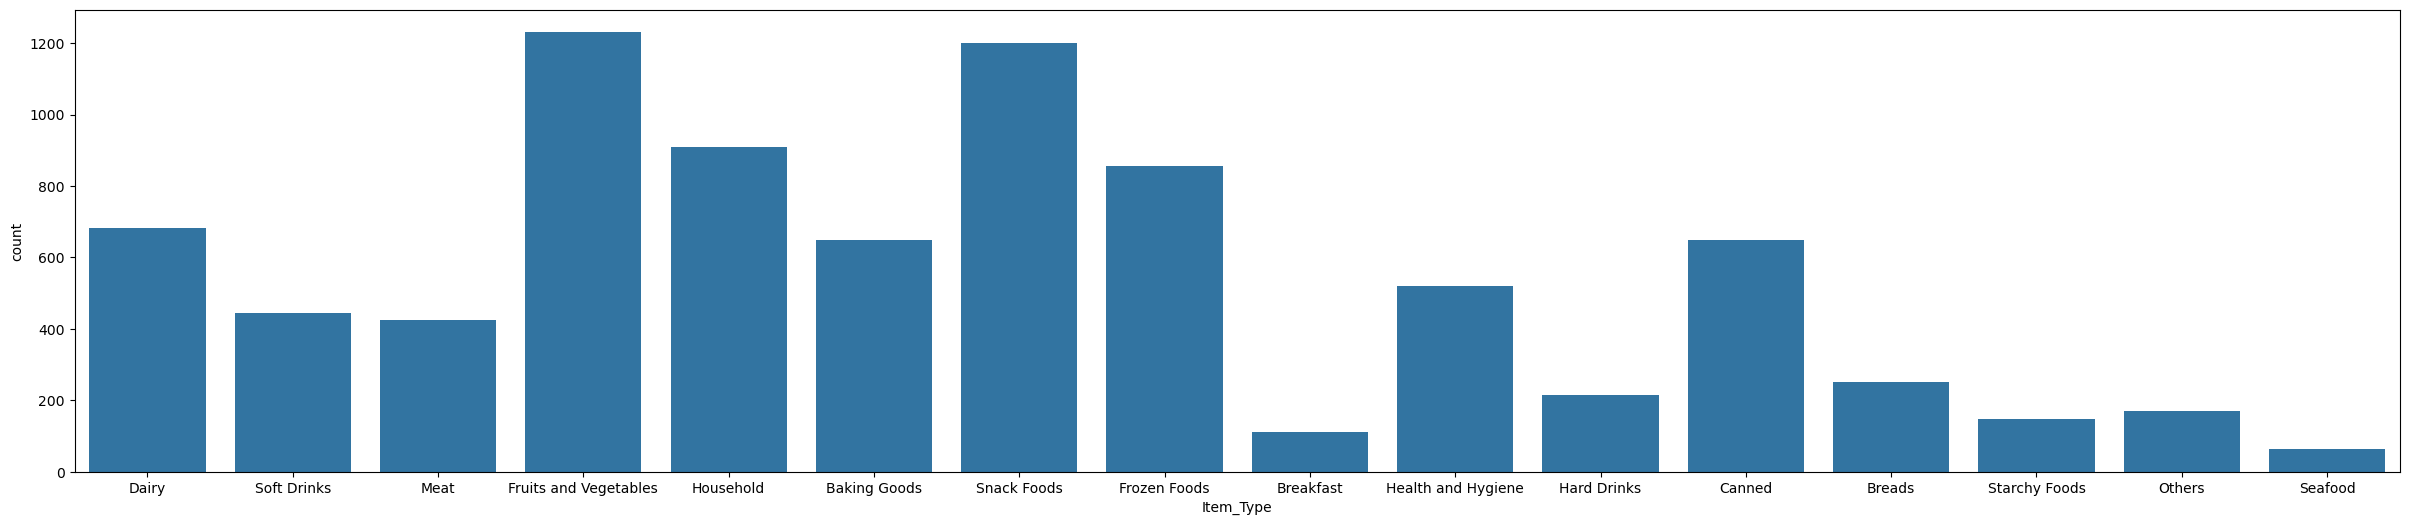

In [52]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=mart_data)
plt.show()

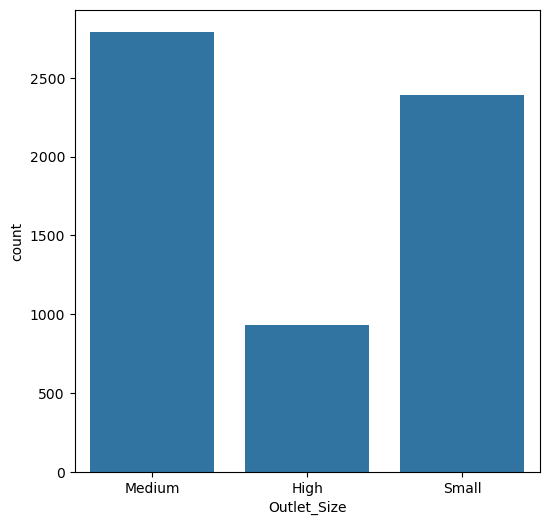

In [54]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=mart_data)
plt.show()

In [56]:
mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [60]:
mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [64]:
mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [66]:
encoder = LabelEncoder()

In [70]:
mart_data['Item_Identifier'] = encoder.fit_transform(mart_data['Item_Identifier'])  

mart_data['Item_Fat_Content'] = encoder.fit_transform(mart_data['Item_Fat_Content'])  

mart_data['Item_Type'] = encoder.fit_transform(mart_data['Item_Type'])  

mart_data['Outlet_Identifier'] = encoder.fit_transform(mart_data['Outlet_Identifier'])  

mart_data['Outlet_Size'] = encoder.fit_transform(mart_data['Outlet_Size'])  

mart_data['Outlet_Location_Type'] = encoder.fit_transform(mart_data['Outlet_Location_Type'])  

mart_data['Outlet_Type'] = encoder.fit_transform(mart_data['Outlet_Type'])  


In [72]:
X = mart_data.drop(columns='Item_Outlet_Sales',axis=1)
Y = mart_data['Item_Outlet_Sales']

In [78]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [80]:
regressor = XGBRegressor()

In [82]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [84]:
train_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train,train_prediction)
r2_train

0.8773882689577641

In [86]:
test_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test,test_prediction)
r2_test

0.5120068134878724